# Review and visualize dataset from Damage Assessment from Social Media Imagery Data During Disasters

This corpus comprises images collected from Twitter during four natural disasters, namely Typhoon Ruby (2014), Nepal Earthquake (2015), Ecuador Earthquake (2016), and Hurricane Matthew (2016). In addition to Twitter images, it contains images collected from Google using queries such as "damage building", "damage bridge", and "damage road" to deal with labeled data scarcity problem.

Dat Tien Nguyen, Ferda Ofli, Muhammad Imran, Prasenjit Mitra. Damage Assessment from Social Media Imagery Data During Disasters. In Proceedings of the IEEE/ACM International Conference on Advances in Social Networks Analysis and Mining (ASONAM), 2017, Sydney, Australia. [Bibtex]

## AWS disaster response hackathon

For the AWS disaster response hackathon one of the challenge is to answer the question : **HOW MIGHT WE ACCURATELY AND EFFICIENTLY DETERMINE THE EXTENT OF DAMAGE TO INDIVIDUAL HOMES IN A GIVEN DISASTER-IMPACTED AREA ?**

To answer that question our team proposed to build and deploy an edge-based computer vision solution on smartphones for damage assessment.

In [1]:
import requests
import tarfile
import wget
import csv
import os

## Check your working directory

Subsequent sessions may require you to identify and update your working directory so paths correctly point at the downloaded data files. You can check your working directory like so:

In [2]:
# Working Directory
cwd = os.getcwd()
cwd

'c:\\Users\\wsn8\\Code\\disaster-damage-assessment-ml\\notebooks'

You can simply assign the working directory to be 'one level above the current directory' by running this line of code with the `..` as the path. 
  
`..` means 'one directory above the current directory.You should be in the noteboks directory, we need to download extract data one level above in the `data` folder.

**Note you should only run it once! If you run it multiple times, you will keep reseting the working directory to one level above the current directory, until you reach the root of the drive!**

In [3]:
# Set Working Directory (if needed)
# you can just do this:
os.chdir(r"..") 

In [4]:
# Confirm it changed the working Directory
print("My working directory:\n" + os.getcwd())
cwd = os.getcwd()
cwd

My working directory:
c:\Users\wsn8\Code\disaster-damage-assessment-ml


'c:\\Users\\wsn8\\Code\\disaster-damage-assessment-ml'

## Download the data


In [5]:
IMAGE_FOLDER = 'ASONAM17_Damage_Image_Dataset'
FILENAME = 'ASONAM17_Damage_Image_Dataset.tar.gz'

In [6]:

DATA_PATH = os.path.join(cwd, 'data')
IMAGES_PATH = os.path.join(cwd,'data',IMAGE_FOLDER)
FILE_PATH = os.path.join(cwd,'data',FILENAME)
DATA_PATH,IMAGES_PATH,FILE_PATH


('c:\\Users\\wsn8\\Code\\disaster-damage-assessment-ml\\data',
 'c:\\Users\\wsn8\\Code\\disaster-damage-assessment-ml\\data\\ASONAM17_Damage_Image_Dataset',
 'c:\\Users\\wsn8\\Code\\disaster-damage-assessment-ml\\data\\ASONAM17_Damage_Image_Dataset.tar.gz')

In [7]:
def download_images(target_path):
    url = 'https://crisisnlp.qcri.org/data/ASONAM17_damage_images/ASONAM17_Damage_Image_Dataset.tar.gz'
    target_path = target_path
    filename = wget.download(url=url, out=target_path)
    return filename

def extract_images(target_path, filename='ASONAM17_Damage_Image_Dataset.tar.gz'):

    print(target_path)

    tar = tarfile.open(os.path.join(target_path,filename))
    tar.extractall(path=target_path)
    tar.close()

In [8]:
# check if folder or images already exits first
if os.path.isdir(IMAGES_PATH) and os.path.exists(FILE_PATH):
    print("data already downloaded and extracted ")
else:
    print("downloading and extracting images data")
    filename = download_images(DATA_PATH)
    extract_images(target_path=DATA_PATH, filename=filename)

data already downloaded and extracted 


## Count of images by class and by event

For damage assessment, we consider three levels: severe damage, mild damage, and little-to-no damage.


In [9]:
import os
import pandas as pd

def get_damages_image_dataset_table(images_path):
    events=[]
    for f in os.listdir(images_path):
        if not f.startswith('.'):
            if os.path.isdir(os.path.join(images_path,f)):
                events.append(f)

    data = {}            
    for directory in events:
        if directory !='ggImage':
            data[directory] = {}
            total_images = len(os.listdir(os.path.join(images_path,directory)))
            #print(f"{directory} : {total_images}")
            data[directory]['total'] = total_images
            data[directory]['none'] = 0
            data[directory]['mild'] = 0
            data[directory]['severe'] = 0
            data[directory]['unlabelled'] = 0
            for f in os.listdir(os.path.join(images_path,directory)):
                if f.find("none") > 0:
                    data[directory]['none'] +=1
                if f.find("mild") > 0:
                    data[directory]['mild'] +=1
                if f.find('severe') > 0 :
                    data[directory]['severe'] +=1
                if f.find('unlabelled') > 0:
                    data[directory]['unlabelled'] +=1
        if directory =='ggImage':
            total_damage = 0
            total_none = 0
            data[directory] = {}
            for f in os.listdir(os.path.join(images_path,directory)):
                 if not f.startswith('.'):
                        path = os.path.join(images_path,directory,f)
                        if f != 'extra_none_ggIM':
                            total_damage += len(os.listdir(path))
                        else:
                            total_none += len(os.listdir(path))

            data[directory]['none'] = total_none
            data[directory]['unlabelled'] = total_damage
            data[directory]['total'] = total_none + total_damage
           
    return pd.DataFrame(data)
                                         
        

In [10]:
## Get count of the number of images by class
get_damages_image_dataset_table(IMAGES_PATH)

,ecuador_eq,ggImage,matthew_hurricane,nepal_eq,ruby_typhoon
total,2280,3007.0,596,19104,833
none,791,463.0,127,7920,400
mild,89,NaN,94,2257,342
severe,844,NaN,112,8927,91
unlabelled,556,2544.0,263,0,0


## Visualize images

In [11]:
def _get_image_by_class(class_name,list_dir):
    return [img for img in list_dir if img.find(class_name) > 0]
    

In [12]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def _visualize_event_images(images_path=IMAGES_PATH,event='ecuador_eq',class_name=None):
    path = os.path.join(images_path,event)
    list_dir = os.listdir(path)
    if class_name:
        list_dir = _get_image_by_class(class_name,list_dir)
    sample_list_dir = random.sample(list_dir,8)
    plt.figure(figsize=(20,18))
    for i,image in enumerate(sample_list_dir):
        plt.subplot(4,4,i+1)
        img = mpimg.imread(os.path.join(path,image))
        imgplot = plt.imshow(img)
        plt.title(image)
    plt.show()

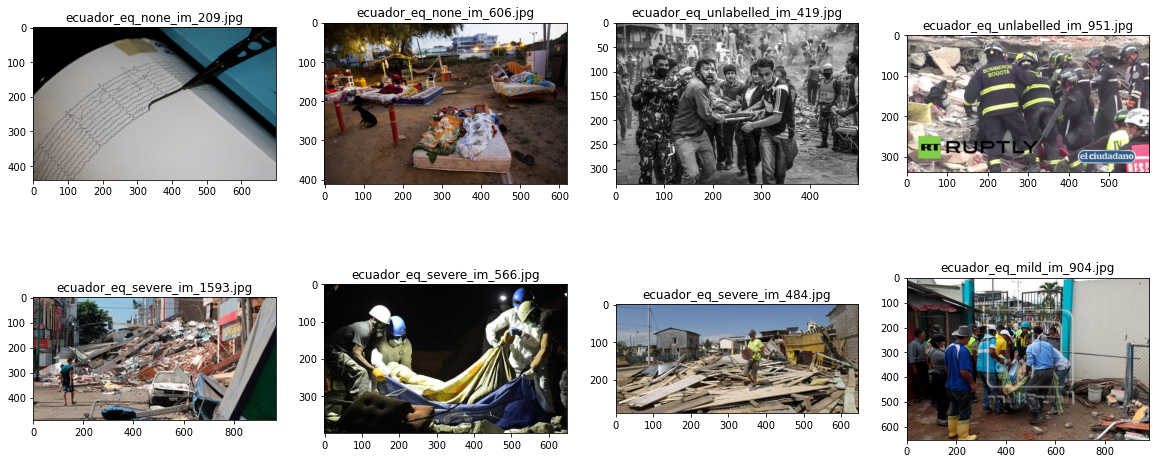

In [13]:
_visualize_event_images()

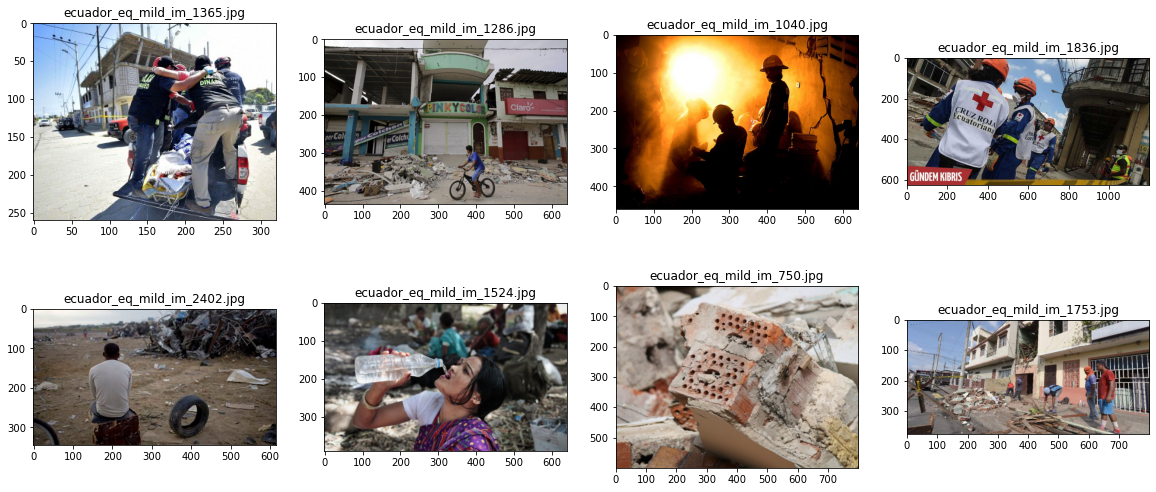

In [29]:
_visualize_event_images(event='ecuador_eq',class_name='mild')

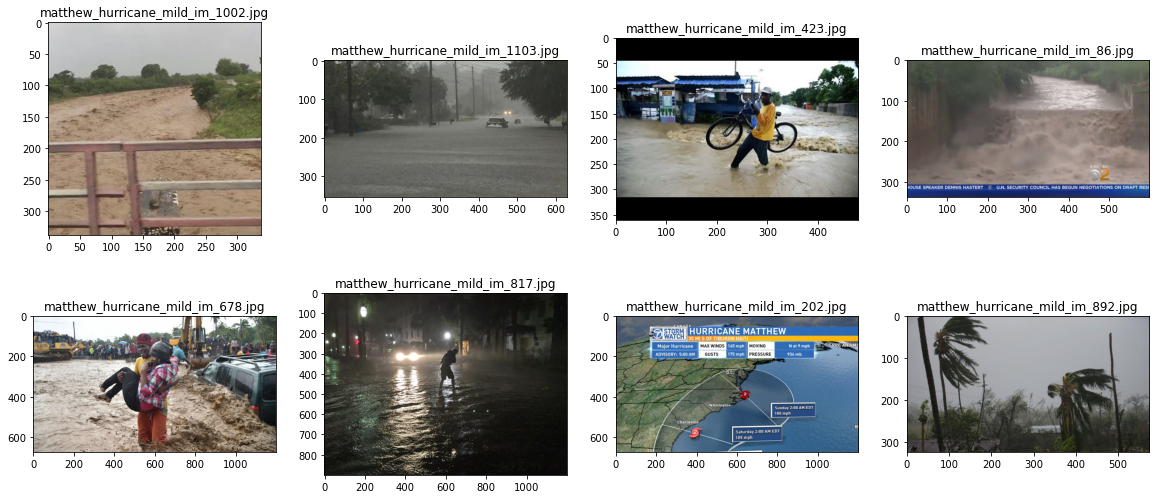

In [22]:
_visualize_event_images(event='matthew_hurricane',class_name='mild')

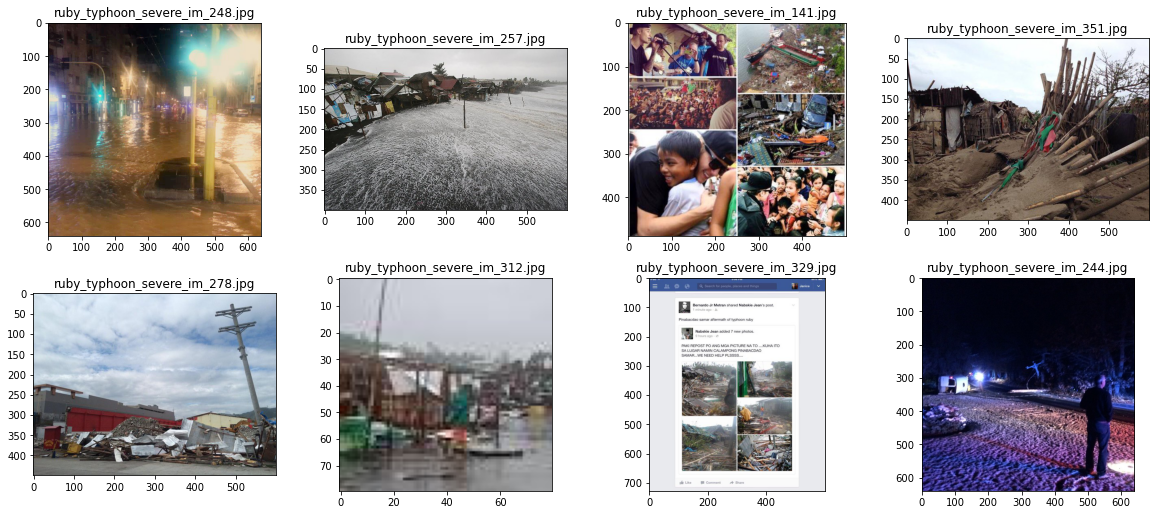

In [23]:
_visualize_event_images(event='ruby_typhoon',class_name='severe')